In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir=r'C:\Users\pooja\Downloads\STUDY\CNN_course\Project\Dataset\train'
validation_dir=r'C:\Users\pooja\Downloads\STUDY\CNN_course\Project\Dataset\validation'
test_dir=r'C:\Users\pooja\Downloads\STUDY\CNN_course\Project\Dataset\test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#Generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1./255) #RGB values lie between 0 and 1. To rescale them to 0 to 1 we divide them by 255
#created so that data is fed in the batches of 20 to the fit model
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(  #flowfromdirectory as our data is in the form of folders/directories
train_dir,
target_size=(150,150),  #size of the iimages that we want since it is not standardized
batch_size=20,   #ffd will feed in the batches of 20 to our train_generator
class_mode='binary') #since binary classification i.e 2 folders cats and dogs 
#As a result of this function, we will get images in the form of floating point tensors with RGB values between 0 and 1

    
validation_generator= test_datagen.flow_from_directory(  #flowfromdirectory as our data is in the form of folders/directories
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) #32 filters of 3*3 window, input is of 150*150 and 3 stands for RGB as it is colorful
model.add(layers.MaxPooling2D((2,2))) #Maxpooling layer of 2*2 window to half the size of the input image. output will be of 75*75

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3))) #double the number of filters
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid')) #as it is binary classification

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',  
             omptimizer=optimizers.RMSprop(lr=1e-4), #RMSprop has more advantages compared to SGD while image processing. learning rate of 0.001
             metrics=['acc'])

In [10]:
history=model.fit_generator( #fit_generator because we have used generator
      train_generator, #generates data continuously hence necessary to mention stopping point
      steps_per_epoch=100, #stopping point. batches of 20. total 2000 hence all will be covered in 100 steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50) #1000/20

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 99s 993ms/step - loss: 0.7136 - acc: 0.5110 - val_loss: 0.6905 - val_acc: 0.5330
Epoch 2/20
100/100 [==============================] - 98s 983ms/step - loss: 0.6888 - acc: 0.5995 - val_loss: 0.6701 - val_acc: 0.5490
Epoch 3/20
100/100 [==============================] - 100s 998ms/step - loss: 0.6408 - acc: 0.6535 - val_loss: 0.6084 - val_acc: 0.6750
Epoch 4/20
100/100 [==============================] - 95s 953ms/step - loss: 0.5867 - acc: 0.7020 - val_loss: 0.6353 - val_acc: 0.6710
Epoch 5/20
100/100 [==============================] - 94s 942ms/step - loss: 0.5484 - acc: 0.7325 - val_loss: 0.5897 - val_acc: 0.6910
Epoch 6/20
100/100 [==============================] - 95s 952ms/step - loss: 0.4912 - acc: 0.7745 - val_loss: 0.5439 - val_acc: 0.7290
Epoch 7/20
100/100 [==============================] - 98s 982ms/step - loss: 0.4186 - acc: 0.80

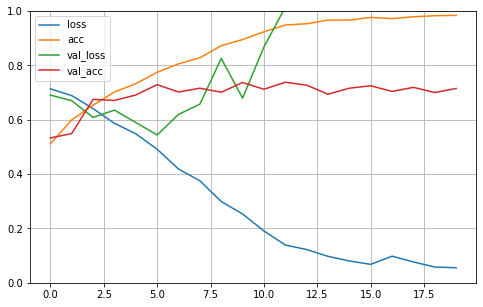

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
#training accuracy is more and increasing with each epoch. and validation accuracy is less. indicates overfitting
#treated by generating more dummy data using data augmentation.

<b> Validation accuracy of 71%.
Large difference between the validation accuracy and training accuracy. Clear case of overfitting.
Data preprocessing or adding a dropout layer will help to treat the problem of overfitting. </b>

In [13]:
#Image Preprocessing
train_datagen= ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range= 0.2, #range- any random value will be selected. similarly for all.
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

#Converting image data to tensors
train_generator= train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')

validation_generator= test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Deactivates 50% of neuronsin each epoch
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc']) #binary_crossentropy since there are only 2 classes
#acc since its classification, so we will calculate accuracy. 

In [15]:
history= model.fit_generator(
train_generator, #data generator which will continuously generate data in batches of 32
steps_per_epoch=100,
epochs=100, #In each epoch approx 3200 images generated
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 0.6924 - acc: 0.5303 - val_loss: 0.6826 - val_acc: 0.5336
Epoch 2/100
100/100 [==============================] - 147s 1s/step - loss: 0.6805 - acc: 0.5716 - val_loss: 0.6700 - val_acc: 0.5596
Epoch 3/100
100/100 [==============================] - 141s 1s/step - loss: 0.6707 - acc: 0.5896 - val_loss: 0.6471 - val_acc: 0.6256
Epoch 4/100
100/100 [==============================] - 148s 1s/step - loss: 0.6572 - acc: 0.6074 - val_loss: 0.6293 - val_acc: 0.6497
Epoch 5/100
100/100 [==============================] - 145s 1s/step - loss: 0.6364 - acc: 0.6348 - val_loss: 0.6499 - val_acc: 0.6053
Epoch 6/100
100/100 [==============================] - 148s 1s/step - loss: 0.6225 - acc: 0.6454 - val_loss: 0.6533 - val_acc: 0.6174
Epoch 7/100
100/100 [==============================] - 147s 1s/step - loss: 0.6132 - acc: 0.6705 - val_loss: 0.5962 - val_acc: 0.6707
Epoch 8/100
100/100 [==============================] - 148s 1s

100/100 [==============================] - 93s 929ms/step - loss: 0.4124 - acc: 0.8160 - val_loss: 0.5153 - val_acc: 0.7487
Epoch 62/100
100/100 [==============================] - 95s 954ms/step - loss: 0.4144 - acc: 0.8028 - val_loss: 0.4320 - val_acc: 0.8103
Epoch 63/100
100/100 [==============================] - 105s 1s/step - loss: 0.4200 - acc: 0.7996 - val_loss: 0.4149 - val_acc: 0.8052
Epoch 64/100
100/100 [==============================] - 95s 951ms/step - loss: 0.4134 - acc: 0.8062 - val_loss: 0.4228 - val_acc: 0.8154
Epoch 65/100
100/100 [==============================] - 92s 917ms/step - loss: 0.4016 - acc: 0.8178 - val_loss: 0.4151 - val_acc: 0.8154
Epoch 66/100
100/100 [==============================] - 103s 1s/step - loss: 0.4054 - acc: 0.8172 - val_loss: 0.4305 - val_acc: 0.8058
Epoch 67/100
100/100 [==============================] - 100s 1s/step - loss: 0.4011 - acc: 0.8185 - val_loss: 0.4541 - val_acc: 0.7970
Epoch 68/100
100/100 [==============================] - 90s 

In [16]:
model.save("project_cnn.h5")

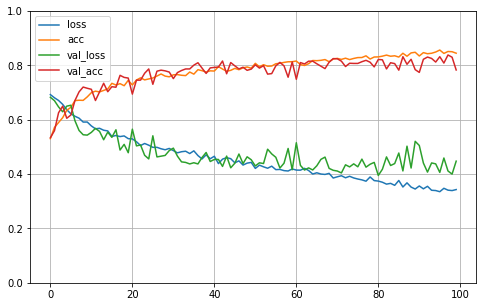

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<b> No evidence of overfitting. </b>

We used data augmentation to increase the validation accuracy to nearly 80%. We will now use <b>VGG16 model architecture</b> to further increase the validation accuracy.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale= 1./255,
rotation_range = 40,
width_shift_range= 0.2,
height_shift_range= 0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

validation_generator= test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import VGG16

conv_base= VGG16(weights='imagenet', #any CNN, provide randomized weights and CNN tries to optimize those weights, imagenet for using pre-trained weights
                include_top=False, #we need only the conv base. and not the fully connected neural network
                input_shape=(150,150,3))



58892288/58889256 [==============================] - 2s 0us/step


In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Now we need to add fully connected dense layer in fromt of this conv_base layer

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [25]:
model=models.Sequential()
model.add(conv_base) #from VGG16
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))  #dense layer with 256 neurons
model.add(layers.Dense(1,activation='sigmoid')) #output layer with single neuron

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


More number of parameters because we are using already trained parameters of VGG16 which are optimized. If we dont want to use the already trained parameters, use the following command:
   #conv_base.trainable=False > It freezes the conv_layer, thus reducing the number of parameters and reducing the execution time
   

In [30]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [32]:
 #training can take hours so better to use callback and save model at each epoch. Parameter save_best=True, saves the model with the best validation accuracy.
    
    checkpoint_cb= keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [34]:
history=model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50,
callbacks=[checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 895s 9s/step - loss: 0.4869 - acc: 0.7590 - val_loss: 0.2231 - val_acc: 0.9100
Epoch 2/30
100/100 [==============================] - 779s 8s/step - loss: 0.2820 - acc: 0.8850 - val_loss: 0.1252 - val_acc: 0.9460
Epoch 3/30
100/100 [==============================] - 823s 8s/step - loss: 0.2239 - acc: 0.9045 - val_loss: 0.3699 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 837s 8s/step - loss: 0.1922 - acc: 0.9225 - val_loss: 0.1339 - val_acc: 0.9490
Epoch 5/30
100/100 [==============================] - 834s 8s/step - loss: 0.1592 - acc: 0.9345 - val_loss: 0.2074 - val_acc: 0.9100
Epoch 6/30
100/100 [==============================] - 815s 8s/step - loss: 0.1278 - acc: 0.9485 - val_loss: 0.1211 - val_acc: 0.9530
Epoch 7/30
100/100 [==============================] - 801s 8s/step - loss: 0.1171 - acc: 0.9490 - val_loss: 0.0872 - val_acc: 0.9630
Epoch 8/30
100/100 [==============================] - 771s 8s/step - 

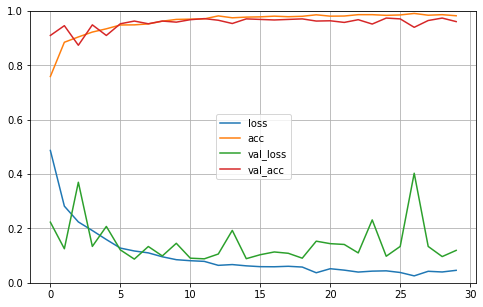

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
hist_df=pd.DataFrame(history.history)

In [37]:
hist_csv_file= 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [38]:
#using test data for the model
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [39]:
model.evaluate_generator(test_generator, steps=50)

[0.20777605174627298, 0.954]

First is the loss value and second is the accuracy value. Accuracy=95.4%